In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = df.pop('label')

In [5]:
pca = PCA(n_components=200)
df_pca = pca.fit_transform(df)

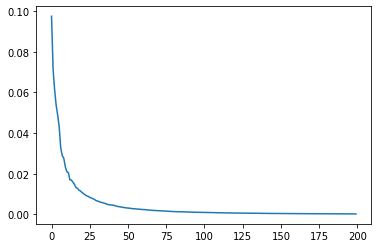

In [6]:
plt.plot(np.arange(200), pca.explained_variance_ratio_)
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df, y)

In [8]:
class_weight = dict((y.value_counts().sum() - y.value_counts()) / y.value_counts().sum())
class_weight

{1: 0.8884761904761905,
 7: 0.8952142857142857,
 3: 0.8964047619047619,
 9: 0.9002857142857142,
 2: 0.900547619047619,
 6: 0.9015,
 0: 0.9016190476190477,
 4: 0.9030476190476191,
 8: 0.9032619047619047,
 5: 0.9096428571428572}

In [9]:
rf = RandomForestClassifier(
            n_estimators=150,
            max_depth=None,
            min_samples_split=50,
            max_leaf_nodes=500,
            class_weight=class_weight,
            n_jobs=4)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.9016190476190477,
                                     1: 0.8884761904761905,
                                     2: 0.900547619047619,
                                     3: 0.8964047619047619,
                                     4: 0.9030476190476191,
                                     5: 0.9096428571428572, 6: 0.9015,
                                     7: 0.8952142857142857,
                                     8: 0.9032619047619047,
                                     9: 0.9002857142857142},
                       max_leaf_nodes=500, min_samples_split=50,
                       n_estimators=150, n_jobs=4)

In [10]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.9686349206349206, 0.9494285714285714)

In [10]:
# train_acc = []
# test_acc = []

# k = 5

# kf_cv = KFold(n_splits=k)

# rf = RandomForestClassifier(
#             n_estimators=150,
#             max_depth=None,
#             min_samples_split=50,
#             max_leaf_nodes=500,
#             class_weight=class_weight,
#             n_jobs=4)

# for train_index, test_index in kf_cv.split(df):
#     # Train-test split
#     X_train, X_test, y_train, y_test = df.iloc[train_index], df.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

#     # Fit
#     rf.fit(X_train, y_train)
#     # Prediction
#     y_pred_train = rf.predict(X_train)    # Local train
#     y_pred_test = rf.predict(X_test)      # Local test

#     # RMSE
#     train_acc.append(accuracy_score(y_train, y_pred_train))
#     test_acc.append(accuracy_score(y_test, y_pred_test))

# print('Local train ACC:', np.array(train_acc).mean())
# print('Local test ACC: ', np.array(test_acc).mean())

In [12]:
# Instantiate our model
# logreg = LogisticRegression(C=0.5)


# Fit our model to the training data
rf.fit(df, y)


# Predict on the test data
rf_pred = rf.predict(test)

In [13]:
pred = pd.read_csv('data/sample_submission.csv', index_col='ImageId')
pred.loc[:, 'Label'] = rf_pred
pred.to_csv('predictions.csv')

In [14]:
np.unique(rf_pred)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df, y)
knn = KNeighborsClassifier(n_neighbors=8, weights='distance')
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)

(1.0, 0.966)

In [12]:
adaboost = AdaBoostClassifier(base_estimator=rf, n_estimators=20)
adaboost.fit(X_train, y_train)
adaboost.score(X_train, y_train), adaboost.score(X_test, y_test)

(0.9994285714285714, 0.9736190476190476)

In [16]:
adaboost.fit(df, y)

# Predict on the test data
adaboost_pred = adaboost.predict(test)

In [17]:
pred = pd.read_csv('data/sample_submission.csv', index_col='ImageId')
pred.loc[:, 'Label'] = adaboost_pred
pred.to_csv('predictions_ada.csv')

In [23]:
from tensorflow.keras import layers, Sequential, optimizers, losses, metrics
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [31]:
model=Sequential()
model.add(layers.Dense(500, activation="relu"))
model.add(layers.Dense(300, activation="relu"))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(10, activation="sigmoid"))

In [32]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss=losses.SparseCategoricalCrossentropy(),
              metrics=metrics.SparseCategoricalAccuracy())

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df, y)
with tf.device("CPU:0"):
    model.fit(X_train,y_train,epochs=10)

Epoch 1/10
985/985 [==============================] - 10s 9ms/step - loss: 3.3526 - sparse_categorical_accuracy: 0.8293
Epoch 2/10
985/985 [==============================] - 8s 9ms/step - loss: 0.6786 - sparse_categorical_accuracy: 0.9283
Epoch 3/10
985/985 [==============================] - 9s 9ms/step - loss: 0.3353 - sparse_categorical_accuracy: 0.9539
Epoch 4/10
985/985 [==============================] - 10s 10ms/step - loss: 0.1915 - sparse_categorical_accuracy: 0.9678 
Epoch 5/10
985/985 [==============================] - 9s 9ms/step - loss: 0.1473 - sparse_categorical_accuracy: 0.9734
Epoch 6/10
985/985 [==============================] - 11s 11ms/step - loss: 0.1261 - sparse_categorical_accuracy: 0.9778
Epoch 7/10
985/985 [==============================] - 10s 10ms/step - loss: 0.0948 - sparse_categorical_accuracy: 0.9820
Epoch 8/10
985/985 [==============================] - 9s 9ms/step - loss: 0.1087 - sparse_categorical_accuracy: 0.9814
Epoch 9/10
985/985 [====================

In [34]:
model.evaluate(X_test, y_test)

329/329 [==============================] - 4s 11ms/step - loss: 0.5665 - sparse_categorical_accuracy: 0.9499


[0.5664541721343994, 0.94990473985672]

In [35]:
model.fit(df,y,epochs=2)

Epoch 1/2
1313/1313 [==============================] - 24s 18ms/step - loss: 0.1897 - sparse_categorical_accuracy: 0.9747
Epoch 2/2
1313/1313 [==============================] - 23s 18ms/step - loss: 0.0722 - sparse_categorical_accuracy: 0.9860


In [40]:
y_pred_proba = model.predict(test)
y_pred = np.argmax(y_pred_proba, axis=1)

In [43]:
np.unique(y_pred, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([3489, 3213, 2980, 3280, 4026, 2288, 2150, 2521, 2805, 1248],
       dtype=int64))

In [44]:
pred = pd.read_csv('data/sample_submission.csv', index_col='ImageId')
pred.loc[:, 'Label'] = y_pred
pred.to_csv('predictions_dense.csv')